# Contents

- Basics (Python installation and setup)
- Pandas DataFrame
- Reading data from files
- Descriptive statistics
- Plotting data
- Correlation
- Linear regression
- _t_-tests
- ANOVA

# Imports and settings

In [1]:
%matplotlib inline

In [22]:
import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Reading data from files

In [4]:
iris = pd.read_csv("data/iris.csv")

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Descriptive statistics

In [7]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Plotting data

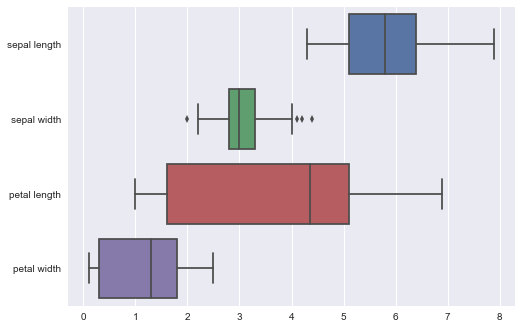

In [8]:
sns.boxplot(data=iris, orient="h")

Test for normality

In [9]:
sp.stats.shapiro(iris["sepal length"])

(0.9760897755622864, 0.01017984002828598)

In [10]:
sp.stats.shapiro(iris["sepal width"])

(0.9837918877601624, 0.0751834362745285)

In [11]:
sp.stats.shapiro(iris["petal length"])

(0.8764241933822632, 7.544982416618495e-10)

# Correlation

In [12]:
exam = pd.read_csv("data/exam.csv", index_col=0)

In [13]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1 to 103
Data columns (total 4 columns):
revise     103 non-null int64
exam       103 non-null int64
anxiety    103 non-null float64
gender     103 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ KB


In [14]:
exam.head()

,revise,exam,anxiety,gender
code,,,,
1,4,40,86.298,Male
2,11,65,88.716,Female
3,27,80,70.178,Male
4,53,80,61.312,Male
5,4,40,89.522,Male


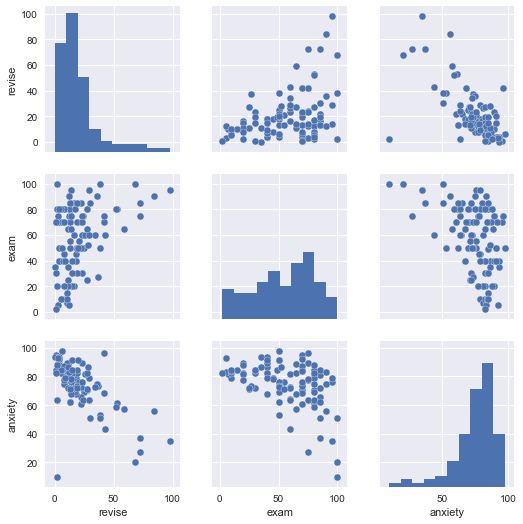

In [15]:
sns.pairplot(data=exam)

In [16]:
exam.corr()

,revise,exam,anxiety
revise,1.000000,0.396721,-0.655760
exam,0.396721,1.000000,-0.439671
anxiety,-0.655760,-0.439671,1.000000


In [17]:
exam.corr()**2

,revise,exam,anxiety
revise,1.000000,0.157387,0.430022
exam,0.157387,1.000000,0.193310
anxiety,0.430022,0.193310,1.000000


In [18]:
exam.corr("spearman")

,revise,exam,anxiety
revise,1.000000,0.349895,-0.620397
exam,0.349895,1.000000,-0.403380
anxiety,-0.620397,-0.403380,1.000000


In [19]:
exam.corr("kendall")

,revise,exam,anxiety
revise,1.000000,0.263326,-0.485834
exam,0.263326,1.000000,-0.284396
anxiety,-0.485834,-0.284396,1.000000


# Linear regression

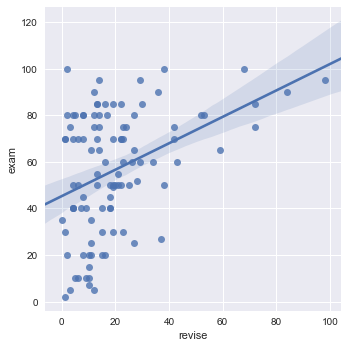

In [20]:
sns.lmplot("revise", "exam", data=exam)

In [23]:
model = sm.OLS(exam["exam"], exam[["revise", "anxiety"]]).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   exam   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     241.2
Date:                Thu, 16 Mar 2017   Prob (F-statistic):           3.47e-39
Time:                        09:35:33   Log-Likelihood:                -481.24
No. Observations:                 103   AIC:                             966.5
Df Residuals:                     101   BIC:                             971.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
revise         0.9385      0.124      7.564      0.000       0.692       1.185
anxiety        0.4851      0.044     11.139      0.000       0.399       0.571
==============================================================================
Omnibus:                        2.024   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.633
Skew:                           0.304   Prob(JB):                        0.442
Kurtosis:                       3.107   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model = smf.ols("exam ~ revise + anxiety", data=exam).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   exam   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     13.61
Date:                Thu, 16 Mar 2017   Prob (F-statistic):           5.93e-06
Time:                        09:35:38   Log-Likelihood:                -468.60
No. Observations:                 103   AIC:                             943.2
Df Residuals:                     100   BIC:                             951.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.3422     17.128      5.275      0.000      56.361     124.323
revise         0.2717      0.168      1.619      0.108      -0.061       0.605
anxiety       -0.5230      0.195     -2.682      0.009      -0.910      -0.136
==============================================================================
Omnibus:                       11.880   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.478
Skew:                          -0.203   Prob(JB):                        0.107
Kurtosis:                       2.063   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""